In [1]:
!export PATH="/home/fzaidoun/anaconda3/envs/him/bin:$PATH"

In [2]:
!conda install -c conda-forge dynesty -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/fzaidoun/anaconda3/envs/him

  added / updated specs:
    - dynesty


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dynesty-1.1                |     pyh44b312d_0          70 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          70 KB

The following NEW packages will be INSTALLED:

  dynesty            conda-forge/noarch::dynesty-1.1-pyh44b312d_0



dynesty-1.1          | 70 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
import numpy as np
from astropy.io import ascii
from functions import *

In [4]:
print("loading data")
cols = ['rabsmag',
        'flag_vsquared',
        'flag_voidfinder']
data = ascii.read('../data_flags_updated_Nov1.dat', include_names=cols)
rabsmag = data['rabsmag']

print("loading classification")
#classification V^2
wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder
wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

## property variables
print("loading property model variables")

# data and range
data1_wall_vf = remove_nan(rabsmag[wall_vf])
data2_void_vf = remove_nan(rabsmag[void_vf])
data1_wall_v2 = remove_nan(rabsmag[wall_v2])
data2_void_v2 = remove_nan(rabsmag[void_v2])
bins_ = np.linspace(-25,-12.5, 250)
label_vf = 'abs_mag_VF'
label_v2 = 'abs_mag_V2'

loading data
loading classification
loading property model variables


plotting histograms of data...


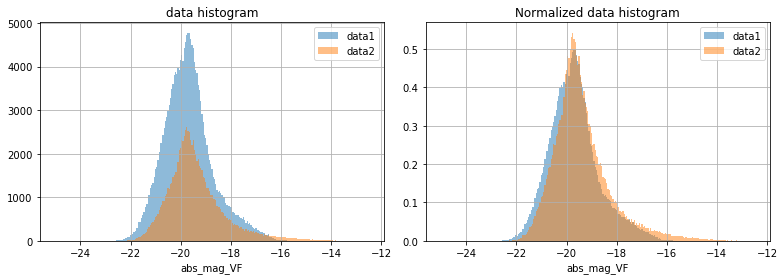

In [5]:
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)


In [11]:
bounds1 = [[2, 3],     # s ........ scale factor (peak 1 to 2) #2.5

           [100., 15000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [-21., -19.],     # mu_a ..... skew normal 1 location  # 0.5
           [0.1,3],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [0., 100.],  # b ........ skew normal 2 amplitude #6100 and 150
           [-16, -14],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew

In [12]:
def prior_xform1(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    s       = uniform(0.1, 10., u[0])
    a       = jeffreys(1000., 15000, u[1])
    mu_a    = uniform(-21., -19., u[2])
    sigma_a = jeffreys(0.1, 2., u[3])
    xi_a    = uniform(-10., 10., u[4])
    b       = jeffreys(0., 100., u[5])
    mu_b    = uniform(0.75, 2., u[6])
    sigma_b = jeffreys(0.1, 2., u[7])
    xi_b    = uniform(-10., 10., u[8])

    return s, a, mu_a, sigma_a, xi_a, b, mu_b, sigma_b, xi_b

In [14]:
bounds1_ = [[100., 15000.],  # a ........ skew normal 1 amplitude #2000
        [-21., -19.],     # mu_a ..... skew normal 1 location #0.5
        [0.1, 3.0],     # sigma_a .. skew normal 1 scale #0.7
        [-10., 10.],    # a_skew ... skew normal 1 skew
        [0., 100.],  # b ........ skew normal 2 amplitude #6100
        [-16, -14],     # mu_b ..... skew normal 2 location #0.9
        [0.1, 2.0],     # sigma_b .. skew normal 2 scale #0.4
        [-10., 10.]]    # a_skew ... skew normal 2 skew

bounds2_ = [[100., 15000.],   # g ........ skew normal 3 amplitude #200
            [-21., -19.],     # mu_g ..... skew normal 3 location #0.5
            [0.1, 3.0],     # sigma_g .. skew normal 3 scale #0.6
            [-10., 10.],    # g_skew ... skew normal 3 skew
            [0., 100.],   # d ........ skew normal 4 amplitude #800
            [-16, -14],     # mu_d ..... skew normal 4 location #0.8
            [0.1, 2.0],     # sigma_d .. skew normal 4 scale #0.3
            [-10., 10.]]    # d_skew ... skew normal 4 skew
bounds2 = bounds1_ + bounds2_

VoidFinder (VF)
plotting histograms of data...


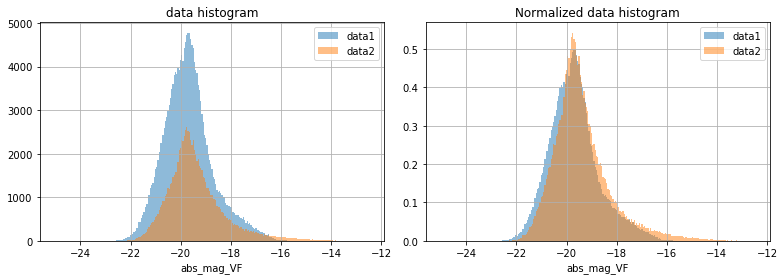

Running Model 1 using VF...


In [15]:

def prior_xform2(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    a       = jeffreys(1., 15000, u[0])
    mu_a    = uniform(-21., -19., u[1])
    sigma_a = jeffreys(0.1, 3., u[2])
    xi_a    = uniform(-10., 10., u[3])
    b       = jeffreys(0., 100., u[4])
    mu_b    = uniform(-16, -14, u[5])
    sigma_b = jeffreys(0.1, 2., u[6])
    xi_b    = uniform(-10., 10., u[7])

    g       = jeffreys(1., 15000, u[8])
    mu_g    = uniform(-21., -19., u[9])
    sigma_g = jeffreys(0.1, 3., u[10])
    xi_g    = uniform(-10., 10., u[11])
    d       = jeffreys(0., 100., u[12])
    mu_d    = uniform(-16, -14, u[13])
    sigma_d = jeffreys(0.1, 2., u[14])
    xi_d    = uniform(-10., 10., u[15])

    return a, mu_a, sigma_a, xi_a, \
           b, mu_b, sigma_b, xi_b, \
           g, mu_g, sigma_g, xi_g, \
           d, mu_d, sigma_d, xi_d


#for VF
print("VoidFinder (VF)")
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)
#model 1
print("Running Model 1 using VF...")

In [ ]:


bounds1_ = [[100., 5000.],  # a ........ skew normal 1 amplitude #2000
        [0.0, 0.7],     # mu_a ..... skew normal 1 location #0.5
        [0.1, 2.0],     # sigma_a .. skew normal 1 scale #0.7
        [-10., 10.],    # a_skew ... skew normal 1 skew
        [100., 5000.],  # b ........ skew normal 2 amplitude #6100
        [0.7, 1.5],     # mu_b ..... skew normal 2 location #0.9
        [0.1, 2.0],     # sigma_b .. skew normal 2 scale #0.4
        [-10., 10.]]    # a_skew ... skew normal 2 skew

bounds2_ = [[100., 1000.],   # g ........ skew normal 3 amplitude #200
            [0.0, 0.7],     # mu_g ..... skew normal 3 location #0.5
            [0.1, 2.0],     # sigma_g .. skew normal 3 scale #0.6
            [-10., 10.],    # g_skew ... skew normal 3 skew
            [100., 1500.],   # d ........ skew normal 4 amplitude #800
            [0.7, 1.5],     # mu_d ..... skew normal 4 location #0.8
            [0.05, 2.0],     # sigma_d .. skew normal 4 scale #0.3
            [-10., 10.]]    # d_skew ... skew normal 4 skew
bounds2 = bounds1_ + bounds2_


In [ ]:
 [ 5.79589501e+02  4.55783481e-01  2.70967991e-01  1.22018564e+00
  3.38380641e+02  9.86737145e-01  8.71208303e-02 -2.95670809e+00
  1.08500266e+03  4.69157134e-01  2.64230995e-01  1.27756280e+00
  6.61423413e+02  9.84922414e-01  8.53623125e-02 -2.94933579e+00]

running minimizer...this might take a few minutes...
best fit parameters       fun: 73705.36604332001
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.74574004e+04,  0.00000000e+00, -1.08848317e+00, -1.32422429e-01,
       -1.96450857e-01, -6.88597061e+00,  9.90184990e+01, -1.45519153e-02,
        7.27595758e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1210
      nit: 89
     njev: 121
   status: 0
  success: True
        x: array([ 2.00000000e+00,  4.68300833e+03, -2.05881898e+01,  1.33069927e+00,
        1.84677829e+00,  1.00000000e+02, -1.60000000e+01,  1.18438803e+00,
       -6.41898453e-01])


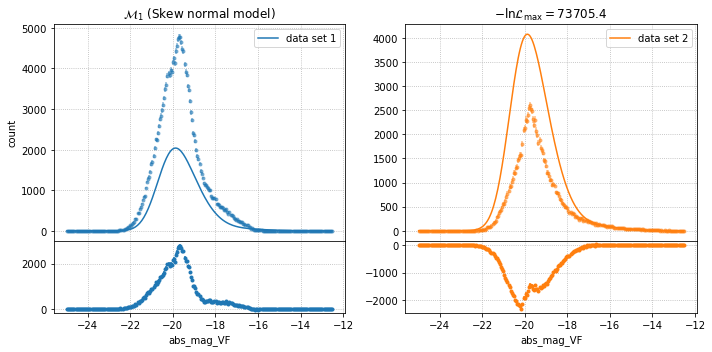

In [8]:
Model_1_fit(bounds1,data1_wall_vf,data2_void_vf,bins_,label_vf)


running the nested sampler... this might take from minutes to hours...


iter: 32118 | batch: 8 | bound: 171 | nc: 1 | ncall: 156156 | eff(%): 20.568 | loglstar: -10491.562 < -10484.639 < -10485.932 | logz: -10516.474 +/-  0.337 | stop:  0.908                            

sampler output saved as pickle file 'sampler_results_model1_abs_mag_VF'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 5.01575928e-01  9.57667166e+03 -2.07201172e+01  1.55614038e+00
  2.46818276e+00  0.00000000e+00  1.37437916e+00  4.41363768e-01
 -2.87485397e-02]
Best fit results: 
Bayesian Evidence for model 1 :  -10516.500815527987


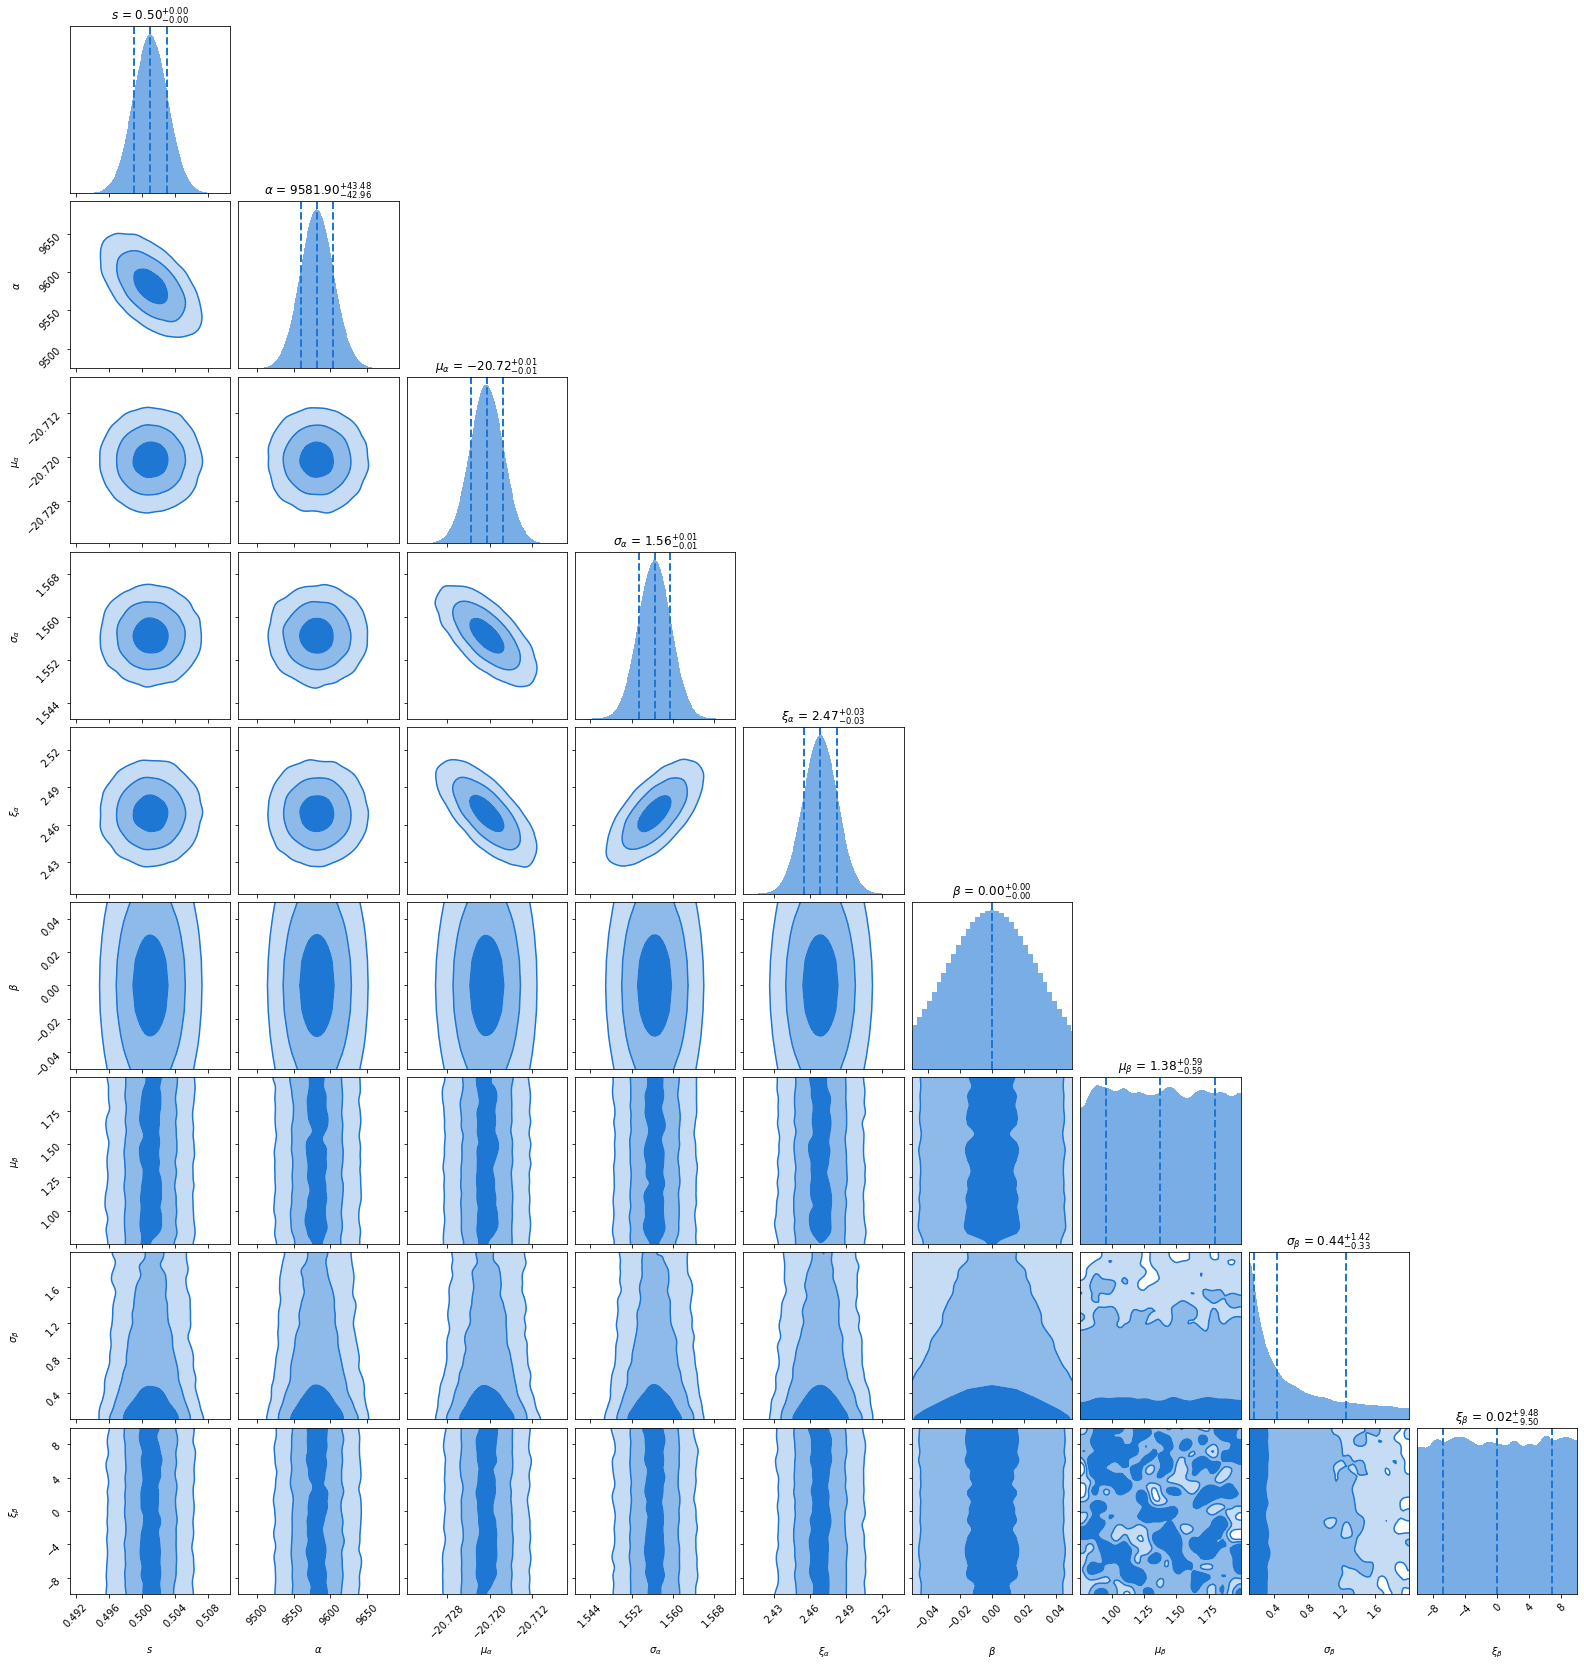

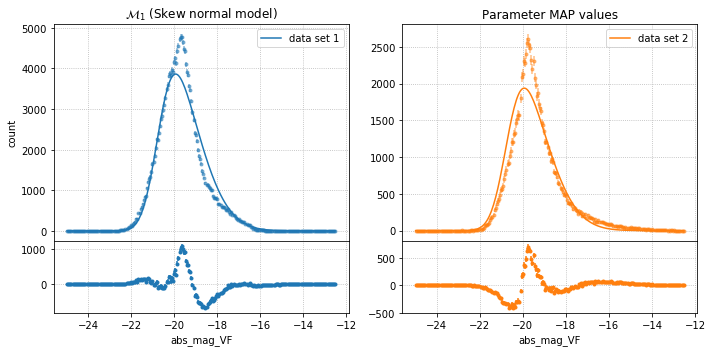

In [13]:
Model_1_sampler(prior_xform1,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ1_vf = Model1_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

Running Model 2 using VF...
running minimizer...this might take a few minutes...
plotting best fit results...


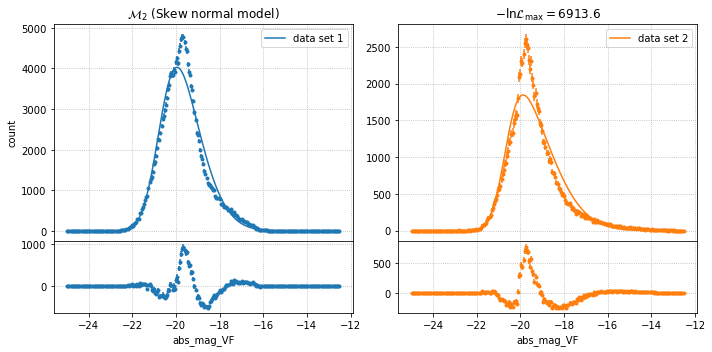

In [16]:
#model2
print("Running Model 2 using VF...")

Model_2_fit(bounds2,data1_wall_vf,data2_void_vf,bins_,label_vf)




running the nested sampler... this might take from minutes to hours...


iter: 1738 | batch: 0 | bound: 1 | nc: 25 | ncall: 16942 | eff(%):  9.964 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.204 | dlogz: 962611.264 >  0.010                                 /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 9773 | batch: 0 | bound: 124 | nc: 25 | ncall: 218424 | eff(%):  4.464 | loglstar:   -inf < -11762.930 <    inf | logz: -11789.271 +/-  0.322 | dlogz: 3694.852 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 10096 | batch: 0 | bound: 129 | nc: 25 | ncall: 226577 | eff(%):  4.446 | logl

iter: 14448 | batch: 0 | bound: 195 | nc: 25 | ncall: 338091 | eff(%):  4.267 | loglstar:   -inf < -7384.586 <    inf | logz: -7418.079 +/-  0.361 | dlogz: 402.250 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14770 | batch: 0 | bound: 200 | nc: 25 | ncall: 346436 | eff(%):  4.257 | loglstar:   -inf < -7313.571 <    inf | logz: -7347.646 +/-  0.364 | dlogz: 331.159 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14975 | batch: 0 | bound: 203 | nc: 25 | ncall: 351808 | eff(%):  4.251 | logl

iter: 19004 | batch: 0 | bound: 266 | nc: 25 | ncall: 455861 | eff(%):  4.164 | loglstar:   -inf < -6961.089 <    inf | logz: -7001.594 +/-  0.396 | dlogz: 37.792 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 19213 | batch: 0 | bound: 269 | nc: 25 | ncall: 461278 | eff(%):  4.161 | loglstar:   -inf < -6955.209 <    inf | logz: -6996.126 +/-  0.399 | dlogz: 33.528 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 19799 | batch: 0 | bound: 277 | nc: 25 | ncall: 476126 | eff(%):  4.154 | logl

iter: 24254 | batch: 0 | bound: 345 | nc: 25 | ncall: 591741 | eff(%):  4.095 | loglstar:   -inf < -6916.618 <    inf | logz: -6963.831 +/-  0.426 | dlogz:  1.364 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 24656 | batch: 0 | bound: 351 | nc: 25 | ncall: 601928 | eff(%):  4.093 | loglstar:   -inf < -6916.035 <    inf | logz: -6963.641 +/-  0.426 | dlogz:  0.900 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 24896 | batch: 0 | bound: 355 | nc: 25 | ncall: 608252 | eff(%):  4.090 | logl

sampler output saved as pickle file 'sampler_results_model2_abs_mag_VF'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 9.57696576e+03 -2.06994777e+01  1.42211244e+00  2.05754087e+00
  0.00000000e+00 -1.49898150e+01  4.46133915e-01  1.99936551e-02
  4.79778959e+03 -2.06717256e+01  1.73572350e+00  3.19446205e+00
  0.00000000e+00 -1.49967791e+01  4.59155408e-01  1.37715999e-01]
Best fit results: 
Bayesian Evidence for model 2 :  -6963.405344291368


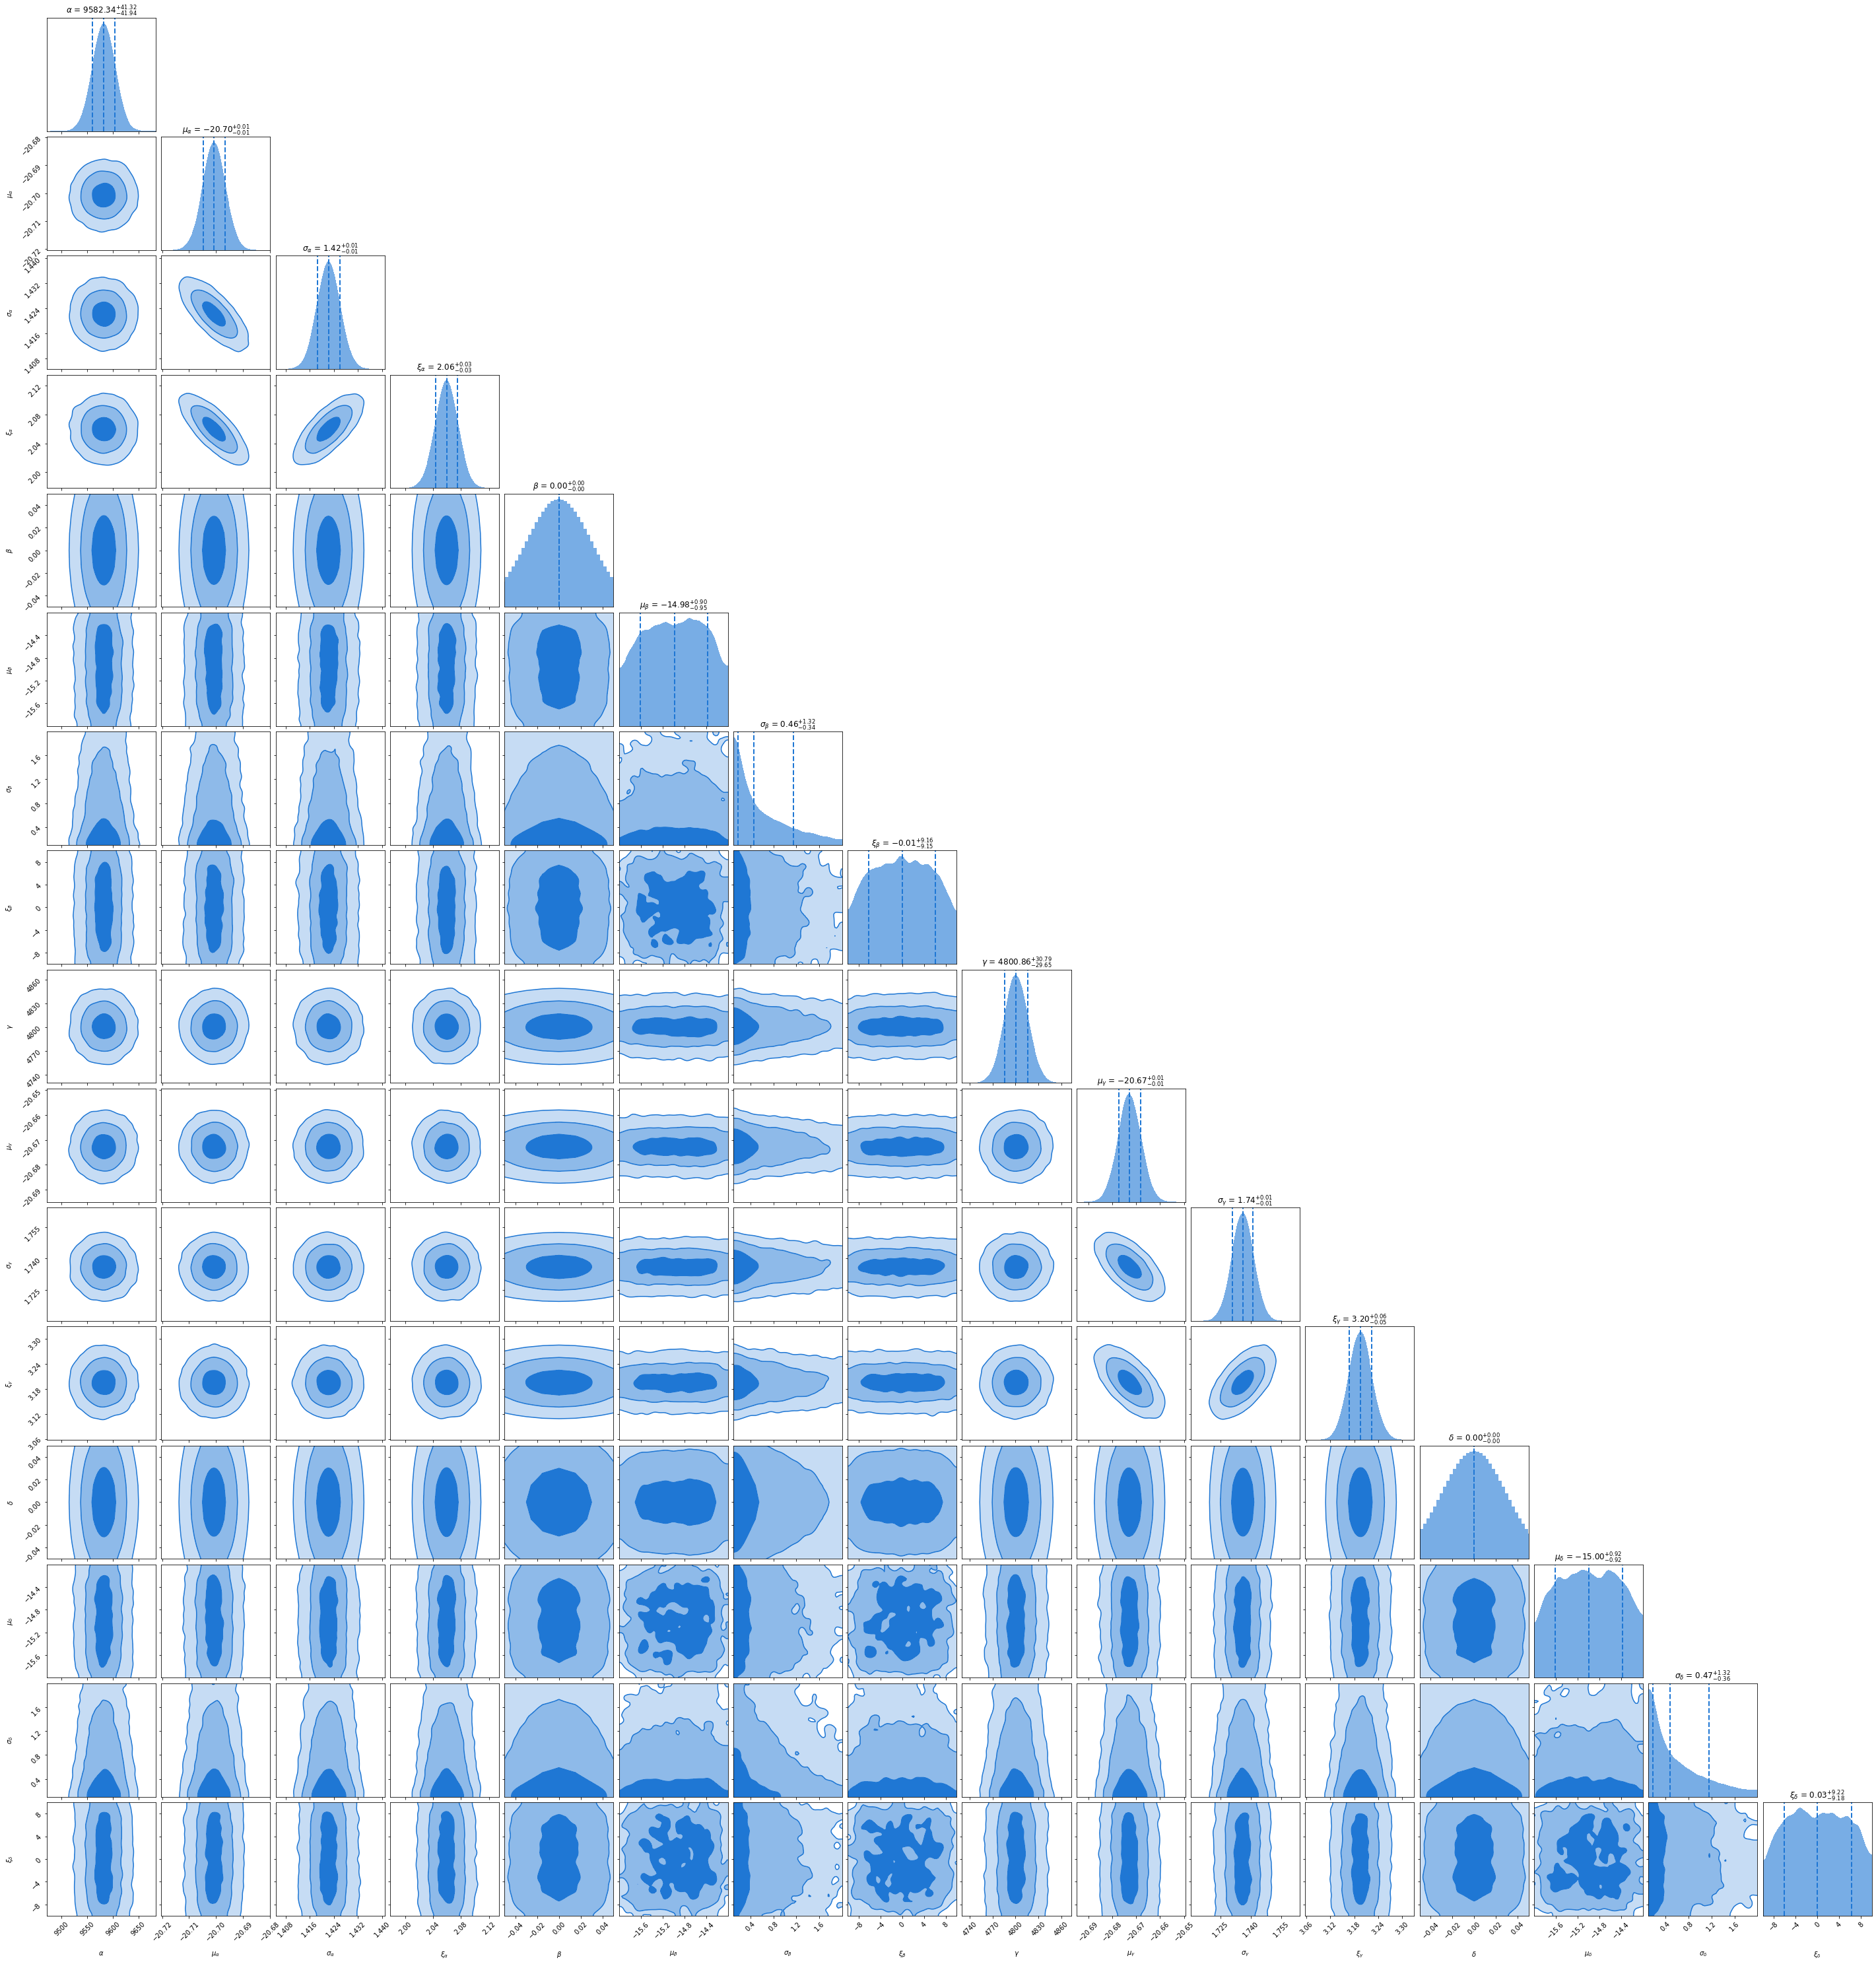

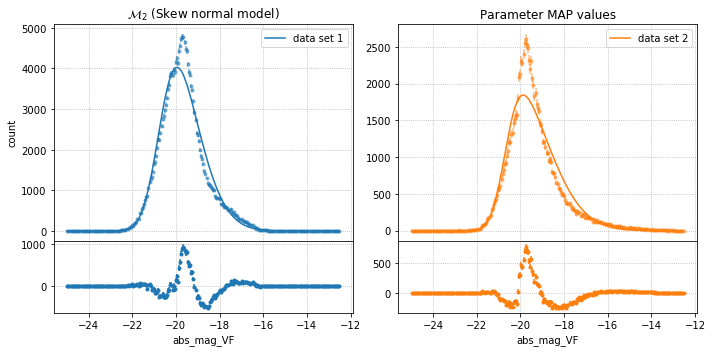

In [17]:
Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)


In [17]:
#Baye's Factor
lnB12_vf = lnZ1_vf - lnZ2_vf
logB12_vf = np.log10(np.e) * lnB12_vf
print("Log10 of Baye's Factor for g-r using VF is: ", logB12_vf)


Log10 of Baye's Factor for g-r using VF is:  -1543.9141956411331


running minimizer...this might take a few minutes...
best fit parameters       fun: 7234.5544721625465
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.52413742e+03,  3.72896771e-03, -3.15685585e-01, -6.94672057e-01,
        1.10048860e-01, -7.96099402e+00,  3.19760121e+00,  1.10503607e-01,
        1.14596332e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1350
      nit: 102
     njev: 135
   status: 0
  success: True
        x: array([ 2.00000000e+00,  5.44390751e+03, -2.06541381e+01,  1.41180245e+00,
        2.05094201e+00,  1.00000000e+02, -1.60000000e+01,  1.51013056e+00,
        1.57797610e-01])
running the nested sampler... this might take from minutes to hours...


iter: 34308 | batch: 9 | bound: 191 | nc: 2 | ncall: 171039 | eff(%): 20.059 | loglstar: -13720.216 < -13712.858 < -13713.862 | logz: -13743.882 +/-  0.332 | stop:  0.840                            

sampler output saved as pickle file 'sampler_results_model1_abs_mag_V2'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 1.90713059e+00  5.73281659e+03 -2.07995895e+01  1.67165420e+00
  2.79079862e+00  0.00000000e+00  1.37560642e+00  4.43819513e-01
  2.44662047e-03]
Best fit results: 
Bayesian Evidence for model 1 :  -13743.901589321873
Running Model 2 using V2...


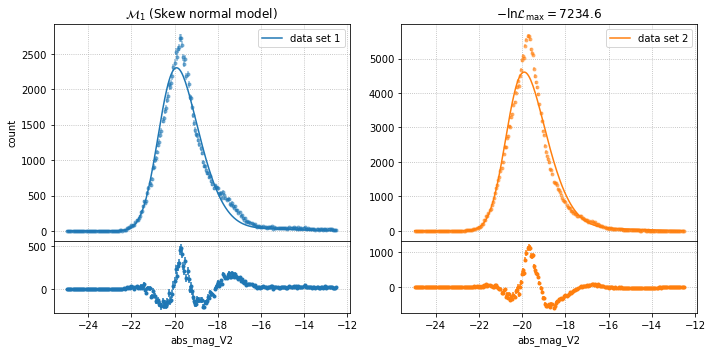

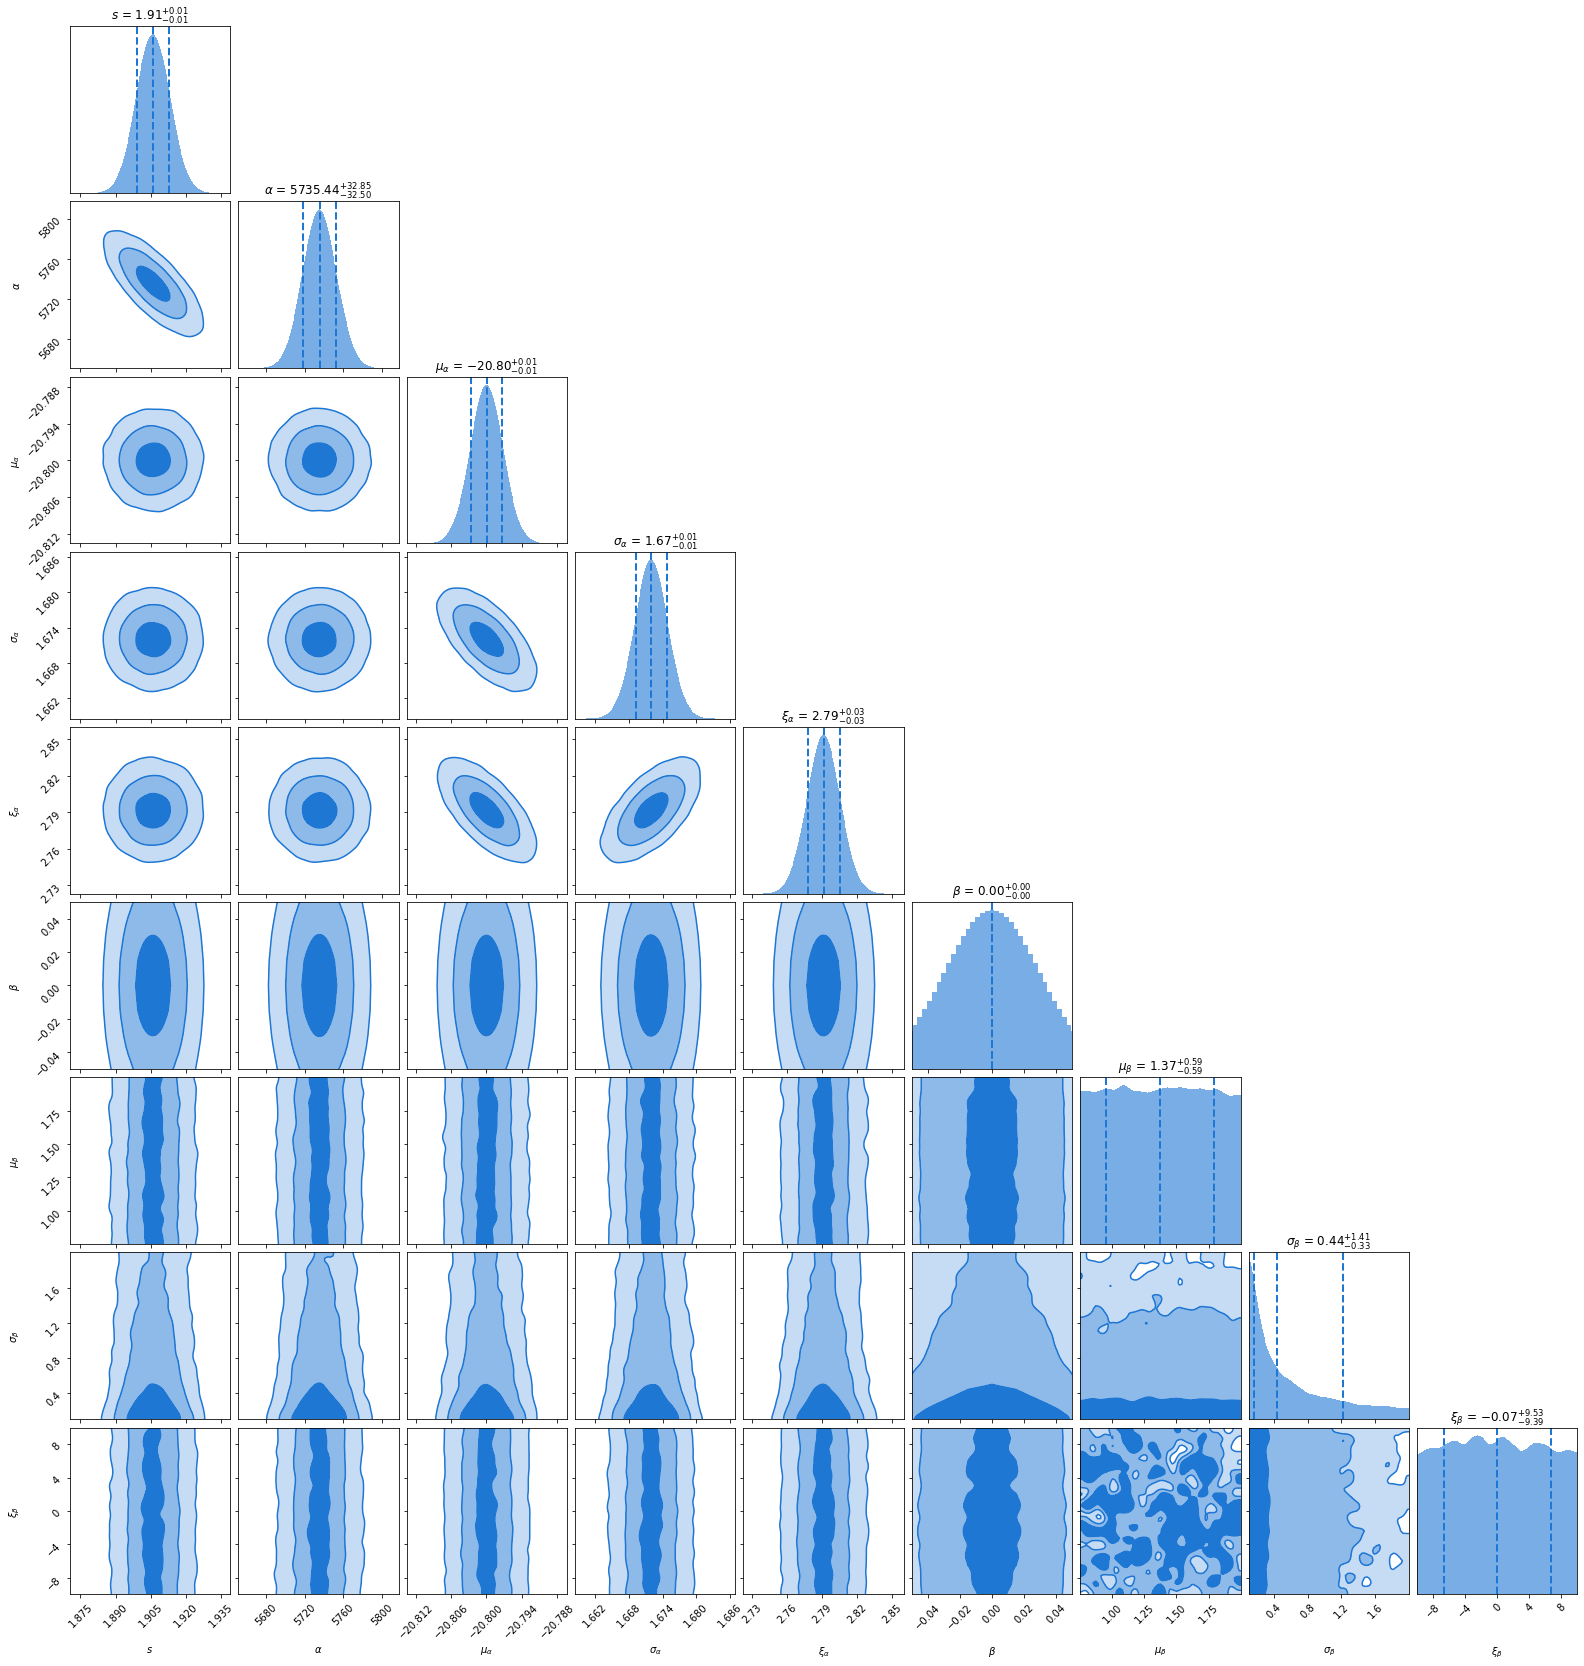

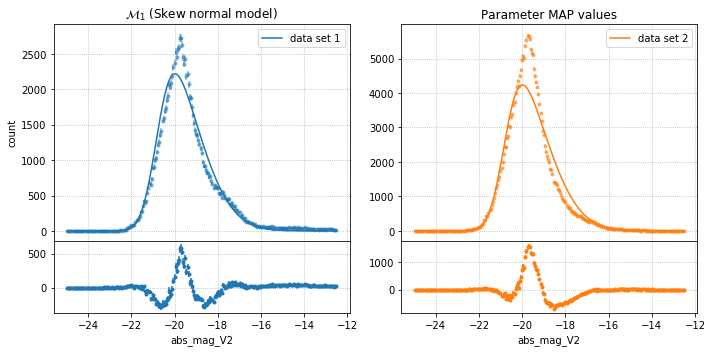

In [18]:


# #for V2
# print("V2")
# plot_hist(data1_wall_v2,data2_void_v2,bins_,label_v2)
# print("Running Model 1 using V2...")

#model 1
Model_1_fit(bounds1,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_1_sampler(prior_xform1,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ1_v2 = Model1_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

print("Running Model 2 using V2...")



running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 1819 | batch: 0 | bound: 1 | nc: 25 | ncall: 17725 | eff(%):  9.981 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.205 | dlogz:    inf >  0.010                                     /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 9152 | batch: 0 | bound: 116 | nc: 25 | ncall: 201113 | eff(%):  4.539 | loglstar:   -inf < -19148.169 <    inf | logz: -19173.355 +/-  0.317 | dlogz: 6614.612 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 9806 | batch: 0 | bound: 126 | nc: 25 | ncall: 217533 | eff(%):  4.497 | logls

iter: 14088 | batch: 0 | bound: 192 | nc: 25 | ncall: 326459 | eff(%):  4.309 | loglstar:   -inf < -10875.407 <    inf | logz: -10909.915 +/-  0.365 | dlogz: 522.460 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14298 | batch: 0 | bound: 195 | nc: 25 | ncall: 331824 | eff(%):  4.302 | loglstar:   -inf < -10819.843 <    inf | logz: -10853.326 +/-  0.362 | dlogz: 464.726 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14581 | batch: 0 | bound: 199 | nc: 25 | ncall: 339063 | eff(%):  4.294 | logl

iter: 17808 | batch: 0 | bound: 249 | nc: 25 | ncall: 422777 | eff(%):  4.207 | loglstar:   -inf < -10366.432 <    inf | logz: -10405.155 +/-  0.388 | dlogz: 74.811 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 18044 | batch: 0 | bound: 253 | nc: 25 | ncall: 428863 | eff(%):  4.203 | loglstar:   -inf < -10356.149 <    inf | logz: -10395.097 +/-  0.389 | dlogz: 64.271 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 18245 | batch: 0 | bound: 256 | nc: 25 | ncall: 434076 | eff(%):  4.198 | logl

iter: 21936 | batch: 0 | bound: 312 | nc: 25 | ncall: 529944 | eff(%):  4.135 | loglstar:   -inf < -10287.869 <    inf | logz: -10332.508 +/-  0.416 | dlogz: 10.498 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 22441 | batch: 0 | bound: 319 | nc: 25 | ncall: 542749 | eff(%):  4.131 | loglstar:   -inf < -10285.478 <    inf | logz: -10330.701 +/-  0.419 | dlogz:  8.534 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 22789 | batch: 0 | bound: 324 | nc: 25 | ncall: 551714 | eff(%):  4.127 | logl

iter: 26417 | batch: 0 | bound: 381 | nc: 25 | ncall: 646230 | eff(%):  4.085 | loglstar:   -inf < -10278.016 <    inf | logz: -10327.187 +/-  0.430 | dlogz:  0.065 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 26643 | batch: 0 | bound: 385 | nc: 25 | ncall: 652105 | eff(%):  4.083 | loglstar:   -inf < -10277.903 <    inf | logz: -10327.177 +/-  0.430 | dlogz:  0.041 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 26773 | batch: 0 | bound: 387 | nc: 25 | ncall: 655605 | eff(%):  4.081 | logl

sampler output saved as pickle file 'sampler_results_model2_abs_mag_V2'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 5.73173523e+03 -2.08790211e+01  1.94417594e+00  3.41933673e+00
  0.00000000e+00 -1.50018159e+01  4.52060400e-01  1.84836188e-01
  1.09256848e+04 -2.07185609e+01  1.48907077e+00  2.32534532e+00
  0.00000000e+00 -1.50066288e+01  4.52580251e-01 -8.44131049e-02]
Best fit results: 
Bayesian Evidence for model 2 :  -10327.128899001907


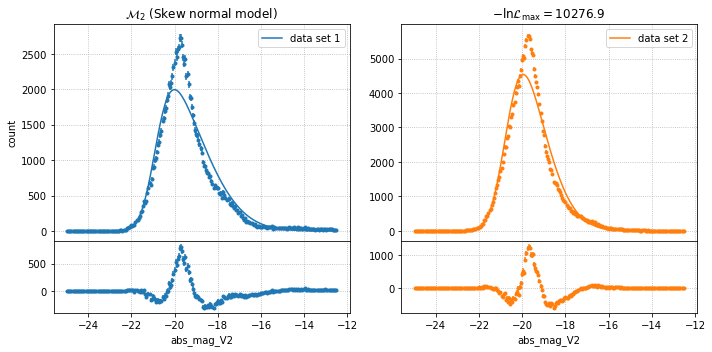

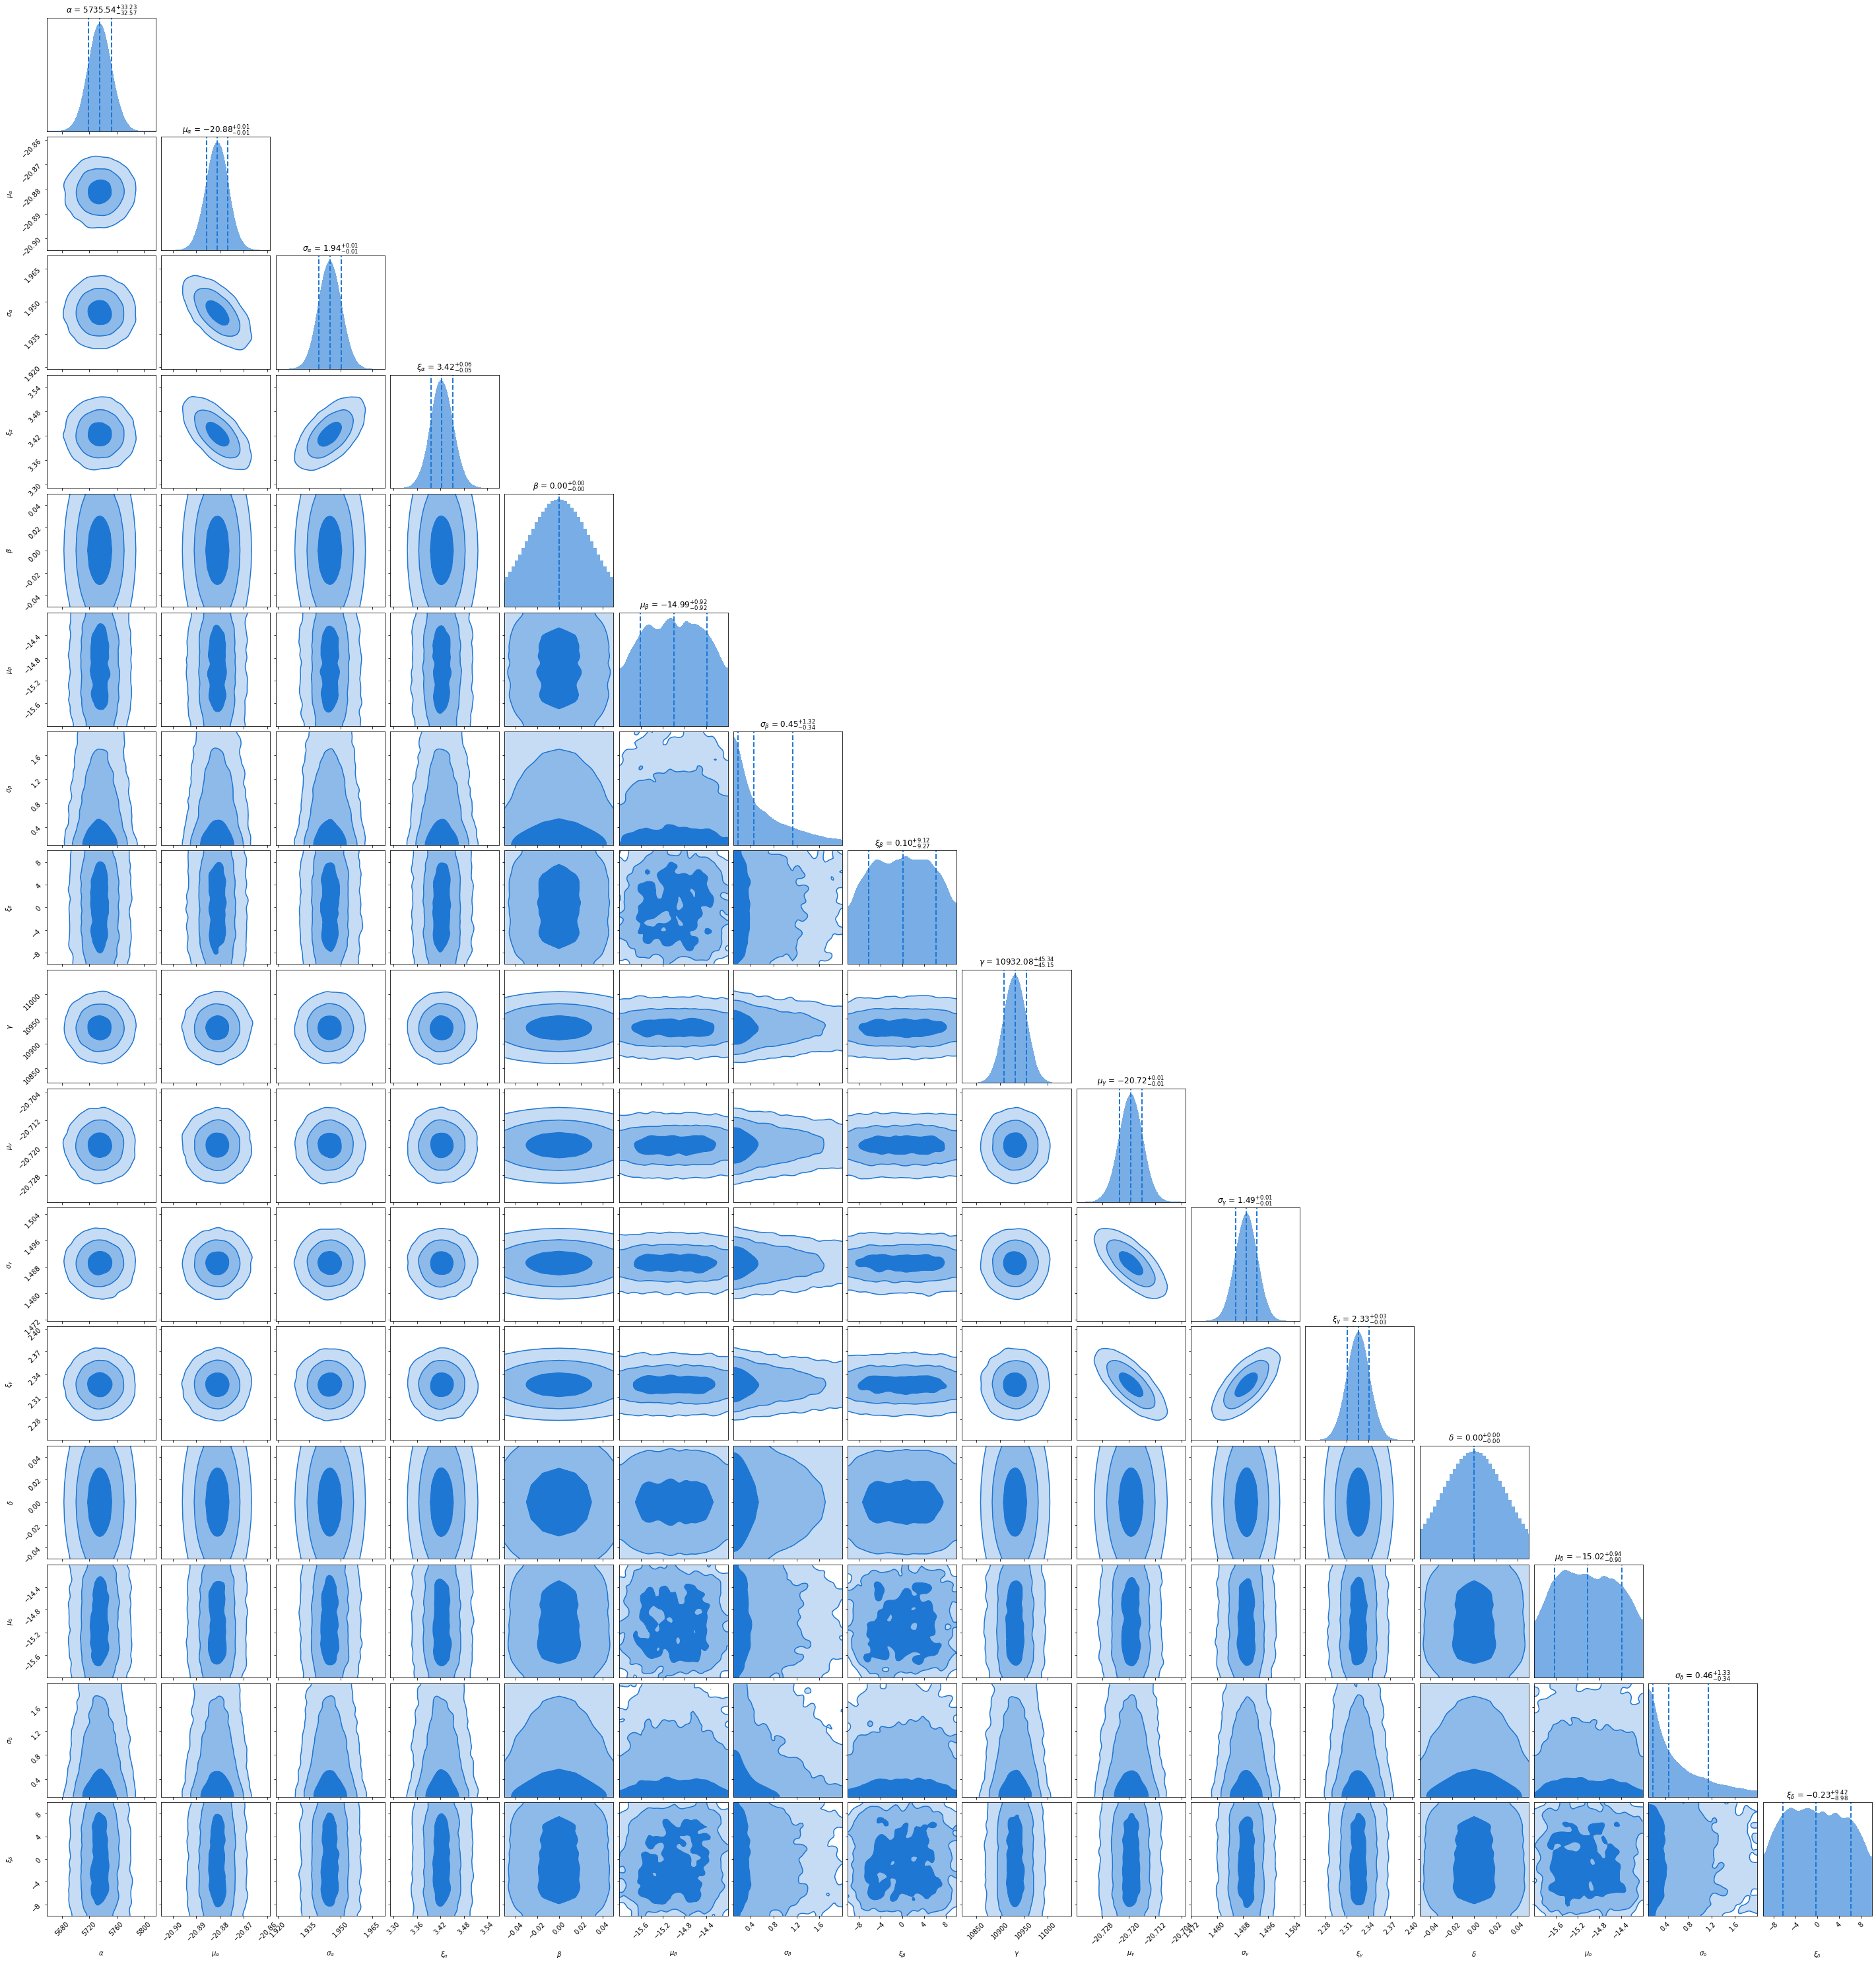

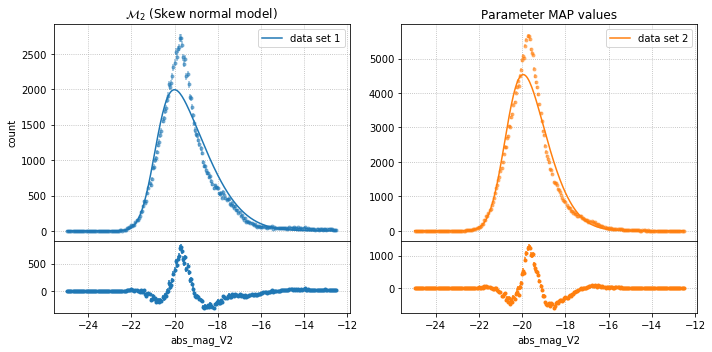

In [19]:
#model2
Model_2_fit(bounds2,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_2_sampler(prior_xform2,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ2_v2 = Model2_output(data1_wall_v2,data2_void_v2,bins_,label_v2)


# #Baye's Factor
# lnB12_v2 = lnZ1_v2 - lnZ2_v2
# logB12_v2 = 0.434 * lnB12_v2

# print("Log of Baye's Factor for g-r using V2 is: ", logB12_v2)